## Importing the required Library

## Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df=pd.read_csv("kidney_disease.csv");

## Exploring Data

In [3]:
df.shape

(400, 26)

In [4]:
df.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# **Data Pre-processing**

In [7]:
df.isnull().sum() # Checking the null values present in each column.

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
df.duplicated().value_counts() # duplicated function checks the duplicate values present in the dataset

False    400
dtype: int64

In [9]:
df["age"].isnull().sum() # Checking the null values in the age column

9

In [10]:
df["age"] = df["age"].fillna(round(df["age"].mean()))

In [11]:
df["age"].isnull().sum() # Re-Checking the null values in the age column

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [13]:
df['classification'].unique()  ## checks the unique values in the classification

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

#### It seems there are some mis-classifcation which is ckd\t, the value represents it as ckd so we are changing the ckd\t to ckd

In [14]:
df[df["classification"]=="ckd\t"]  #checking which row's have this classification

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
230,230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,...,NaN,9500,NaN,yes,yes,no,poor,no,no,ckd\t


In [15]:
df["classification"]=df["classification"].replace("ckd\t","ckd",regex=True) ## Replacing the classifcation ckd\t to ckd

In [16]:
# rechecking the unique values 
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

### Null values handling with median and mode

In [17]:
# Fill missing values for numerical columns with the median
numerical_columns = df.select_dtypes(include=['float64']).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing values for non-numerical columns with the mode
non_numerical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
for column in non_numerical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [19]:
df.isnull().sum() ## re-checking the null values in each column

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### Encoding the labels which converts the object data type to numerical 

In [20]:
# Selects the object-type columns
object_columns = df.select_dtypes(include='object').columns

# Print the head and tail of the value counts for each object-type column
for column in object_columns:
    print(f"--- {column} ---")
    print(df[column].value_counts().head())  # Display the first few value counts
    print(df[column].value_counts().tail())  # Display the last few value counts
    print("\n")

--- rbc ---
normal      353
abnormal     47
Name: rbc, dtype: int64
normal      353
abnormal     47
Name: rbc, dtype: int64


--- pc ---
normal      324
abnormal     76
Name: pc, dtype: int64
normal      324
abnormal     76
Name: pc, dtype: int64


--- pcc ---
notpresent    358
present        42
Name: pcc, dtype: int64
notpresent    358
present        42
Name: pcc, dtype: int64


--- ba ---
notpresent    378
present        22
Name: ba, dtype: int64
notpresent    378
present        22
Name: ba, dtype: int64


--- pcv ---
41    91
52    21
44    19
48    19
40    16
Name: pcv, dtype: int64
18     1
9      1
\t?    1
16     1
14     1
Name: pcv, dtype: int64


--- wc ---
9800    116
6700     10
9600      9
7200      9
9200      9
Name: wc, dtype: int64
19100    1
\t?      1
12300    1
14900    1
12700    1
Name: wc, dtype: int64


--- rc ---
5.2    148
4.5     16
4.9     14
4.7     11
4.8     10
Name: rc, dtype: int64
2.3    1
\t?    1
2.4    1
3      1
8.0    1
Name: rc, dtype: int64


-

#### it seems there are some spaces and wrongly mentioned classificaitions of various columns, will check the columns effecting and will fix them

In [21]:
# Function to check for leading/trailing whitespace in object columns
def check_for_spaces(df):
    space_report = {}
    for col in df.select_dtypes(include='object').columns:
        # Strip leading/trailing whitespace and compare with the original string
        trimmed = df[col].str.strip()
        mask = df[col] != trimmed
        # Report the rows with leading/trailing whitespace
        space_report[col] = df.loc[mask, col]
    return space_report

# Check the dataframe for spaces
report_with_spaces = check_for_spaces(df)

# Output the report
for column, values in report_with_spaces.items():
    if not values.empty:
        print(f"Column '{column}' has leading/trailing spaces in the following rows:")
        print(values)
    else:
        print(f"Column '{column}' has no leading/trailing spaces.")

Column 'rbc' has no leading/trailing spaces.
Column 'pc' has no leading/trailing spaces.
Column 'pcc' has no leading/trailing spaces.
Column 'ba' has no leading/trailing spaces.
Column 'pcv' has leading/trailing spaces in the following rows:
66      \t?
214    \t43
Name: pcv, dtype: object
Column 'wc' has leading/trailing spaces in the following rows:
76     \t6200
133    \t8400
185       \t?
Name: wc, dtype: object
Column 'rc' has leading/trailing spaces in the following rows:
162    \t?
Name: rc, dtype: object
Column 'htn' has no leading/trailing spaces.
Column 'dm' has leading/trailing spaces in the following rows:
30       yes
65      \tno
88     \tyes
138     \tno
188     \tno
194    \tyes
Name: dm, dtype: object
Column 'cad' has leading/trailing spaces in the following rows:
40    \tno
64    \tno
Name: cad, dtype: object
Column 'appet' has no leading/trailing spaces.
Column 'pe' has no leading/trailing spaces.
Column 'ane' has no leading/trailing spaces.
Column 'classification' h

#### Let's fix by stipping the whitespaces and correcting the values

In [22]:
# Correcting 'dm' and 'cad' columns by removing whitespaces and replacing with correct labels
df['dm'] = df['dm'].str.strip().replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].str.strip().replace({'\tno': 'no'})

In [23]:
### let's check wethere it is fixed dm and cad columns or not 
df['dm'].value_counts()

no     263
yes    137
Name: dm, dtype: int64

In [24]:
df['cad'].value_counts()

no     366
yes     34
Name: cad, dtype: int64

#### Let's do manual encoding for all the object class columns since LabelEncoder from sklearn will encode the object classes alphabetically whcih can mislead the postivies and negatives since some of the object columns has their own way of mentioning the positive and negative for example rbc and pc has denoted as normal and abnormal and pcc, ba has present and not present. htn, dm, cad, pe, ane columns as yes and no respectively and classification has ckd and notckd ###

In [25]:
# Convert 'pcv', 'wc', and 'rc' to numeric, coercing errors to NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Fill NaN values in 'pcv', 'wc', and 'rc' after conversion
df['pcv'].fillna(df['pcv'].median(), inplace=True)
df['wc'].fillna(df['wc'].median(), inplace=True)
df['rc'].fillna(df['rc'].median(), inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [27]:
# Apply manual encoding for categorical columns
df['rbc'] = df['rbc'].map({'normal': 0, 'abnormal': 1})
df['pc'] = df['pc'].map({'normal': 0, 'abnormal': 1})
df['pcc'] = df['pcc'].map({'notpresent': 0, 'present': 1})
df['ba'] = df['ba'].map({'notpresent': 0, 'present': 1})
df['appet'] = df['appet'].map({'poor': 0, 'good': 1})
df['htn'] = df['htn'].map({'no': 0, 'yes': 1})
df['dm'] = df['dm'].map({'no': 0, 'yes': 1})
df['cad'] = df['cad'].map({'no': 0, 'yes': 1})
df['pe'] = df['pe'].map({'no': 0, 'yes': 1})
df['ane'] = df['ane'].map({'no': 0, 'yes': 1})

# Manually encoding the 'classification' column
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

#### let's now check the unique values of each object column to make sure encoding is done properly

In [29]:
# List of columns to check
columns_to_check = ['rbc', 'pc', 'pcc', 'htn', 'dm', 'cad', 'pe', 'ane', 'classification']

# Print unique values for each column
for col in columns_to_check:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'rbc': [0 1]
Unique values in 'pc': [0 1]
Unique values in 'pcc': [0 1]
Unique values in 'htn': [1 0]
Unique values in 'dm': [1 0]
Unique values in 'cad': [0 1]
Unique values in 'pe': [0 1]
Unique values in 'ane': [0 1]
Unique values in 'classification': [1 0]


In [30]:
df_ckd = df 

# Saving 'df_ckd' to a CSV file without the index
df_ckd.to_csv('preprocessed_kidney_disease.csv', index=False)

In [31]:
df_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

# **Data Analysis and Visualization**

In [32]:
corr = df_ckd.corr()
corr

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,-0.183723,-0.245378,0.582504,-0.468924,-0.247181,-0.231457,-0.335825,-0.264142,-0.115955,...,0.552960,-0.245197,0.400453,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.273096,-0.838528
age,-0.183723,1.000000,0.136781,-0.158882,0.084204,0.187720,0.011353,0.101898,0.159293,0.043727,...,-0.208008,0.117542,-0.203134,0.393186,0.363334,0.233145,-0.157888,0.094380,0.050237,0.225054
bp,-0.245378,0.136781,1.000000,-0.166980,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,...,-0.285876,0.041212,-0.208429,0.266901,0.226489,0.084135,-0.175054,0.056902,0.195134,0.293693
sg,0.582504,-0.158882,-0.166980,1.000000,-0.479962,-0.292053,-0.253894,-0.365353,-0.306426,-0.231704,...,0.491157,-0.238927,0.371683,-0.323643,-0.351016,-0.135814,0.230975,-0.253803,-0.184155,-0.659504
al,-0.468924,0.084204,0.123518,-0.479962,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,...,-0.470819,0.214292,-0.368210,0.406057,0.308101,0.200957,-0.303145,0.411080,0.229556,0.531562
su,-0.247181,0.187720,0.189561,-0.292053,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,...,-0.180658,0.161298,-0.149470,0.254268,0.430514,0.229301,-0.069216,0.116442,0.042464,0.294555
rbc,-0.231457,0.011353,0.150384,-0.253894,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,...,-0.278263,0.021247,-0.166161,0.140538,0.145646,0.111493,-0.160868,0.199285,0.107625,0.282642
pc,-0.335825,0.101898,0.156231,-0.365353,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,...,-0.417339,0.107953,-0.365479,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260566,0.375154
pcc,-0.264142,0.159293,0.056808,-0.306426,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,...,-0.297980,0.158375,-0.238772,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,-0.115955,0.043727,0.110164,-0.231704,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,...,-0.188624,0.095807,-0.186593,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871


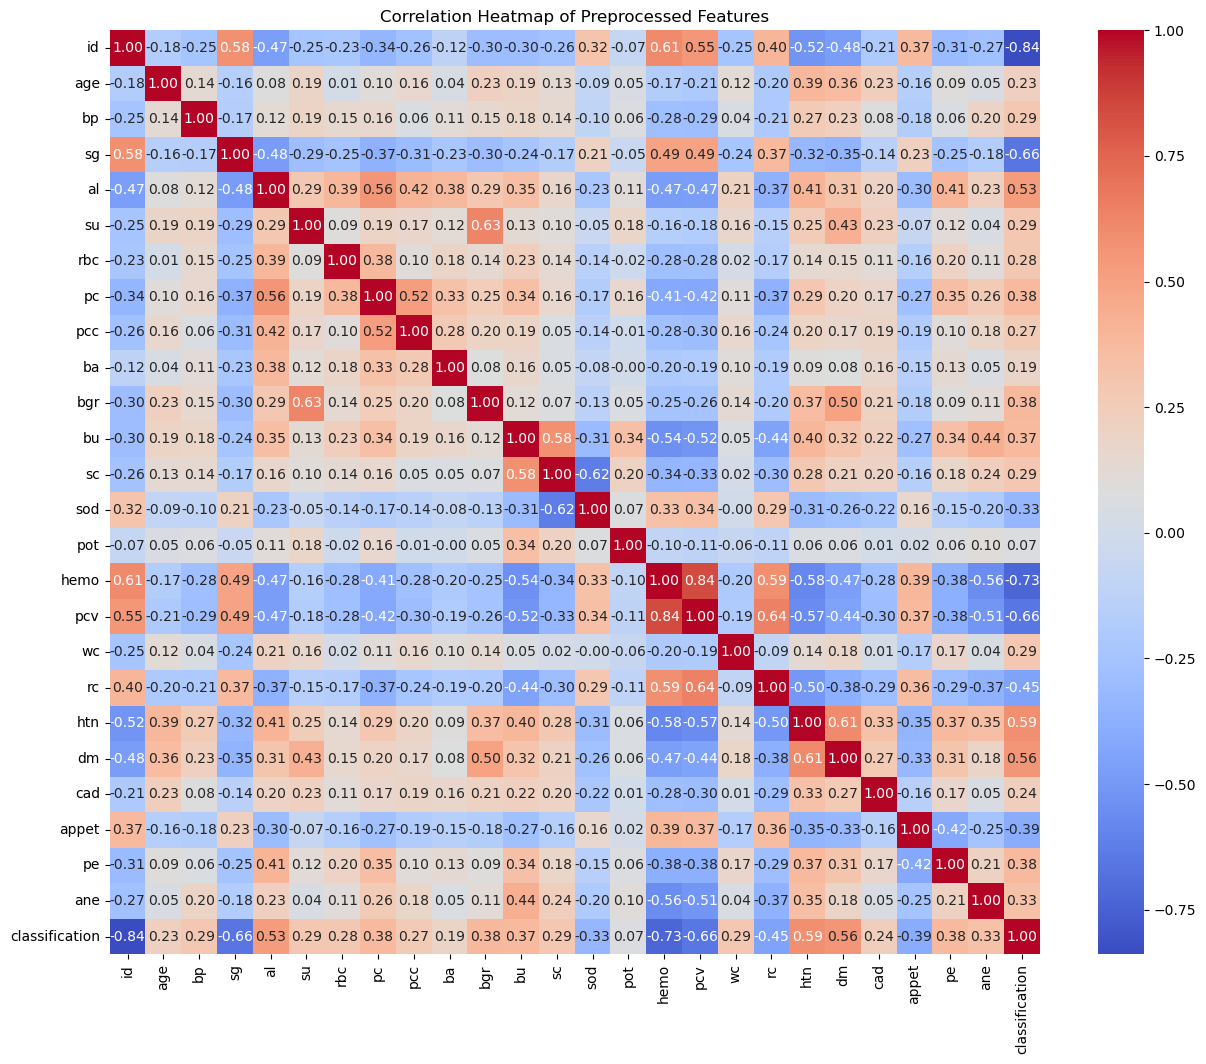

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
df_preprocessed = pd.read_csv('preprocessed_kidney_disease.csv')

# Calculate the correlation matrix
corr = df_preprocessed.corr()

# Generate a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Preprocessed Features')
plt.show()

In [34]:
# Select features with positive correlation greater than 0.5 with the target variable 'classification'
high_corr_features = corr['classification'][(corr['classification'] > 0.3) & (corr['classification'] < 1.0)].index.tolist()

# Display selected features
print("Features with positive correlation > 0.3 with 'classification':", high_corr_features)

Features with positive correlation > 0.3 with 'classification': ['al', 'pc', 'bgr', 'bu', 'htn', 'dm', 'pe', 'ane']


## Hypertension vs CKD

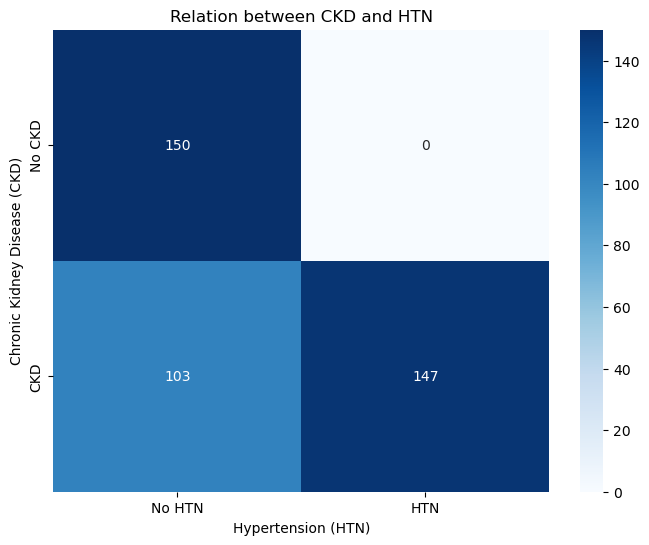

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of CKD and HTN
cross_tab = pd.crosstab(df_ckd['classification'], df_ckd['htn'])

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', xticklabels=['No HTN', 'HTN'], yticklabels=['No CKD', 'CKD'])
plt.xlabel('Hypertension (HTN)')
plt.ylabel('Chronic Kidney Disease (CKD)')
plt.title('Relation between CKD and HTN')
plt.show()


## Diabetes Mellitus vs CKD

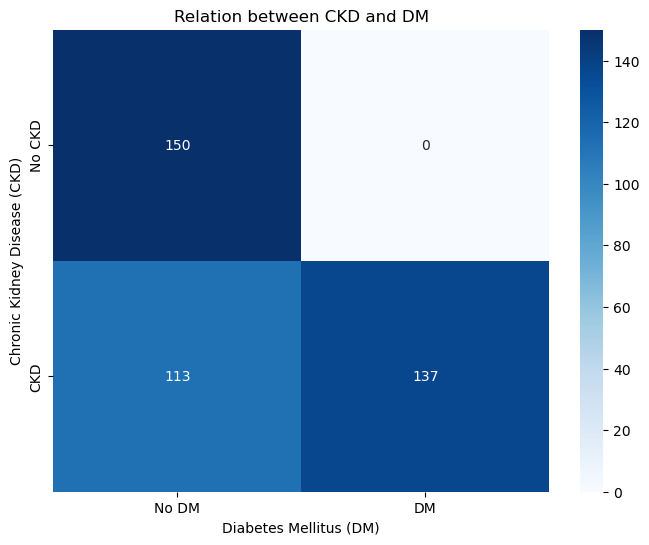

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of CKD and DM
cross_tab = pd.crosstab(df_ckd['classification'], df_ckd['dm'])

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', xticklabels=['No DM', 'DM'], yticklabels=['No CKD', 'CKD'])
plt.xlabel('Diabetes Mellitus (DM)')
plt.ylabel('Chronic Kidney Disease (CKD)')
plt.title('Relation between CKD and DM')
plt.show()

## Albumin vs CKD

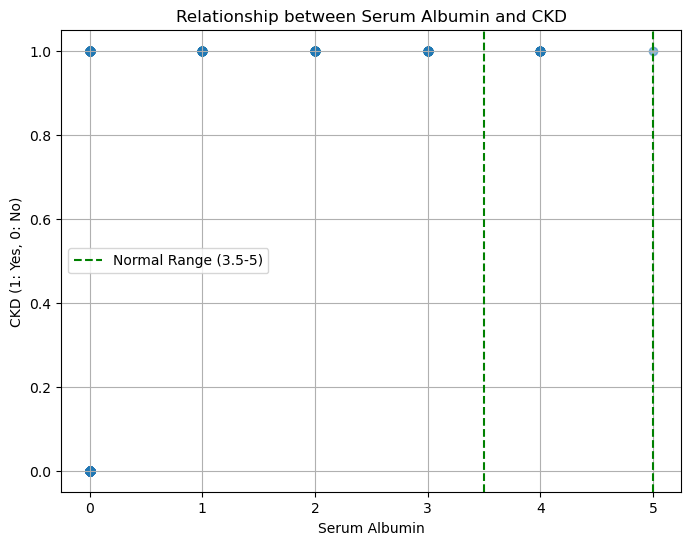

In [37]:
import matplotlib.pyplot as plt

# Extract the 'al' and 'classification' columns from the DataFrame
al = df['al']
ckd = df['classification']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(al, ckd, alpha=0.5)

# Add a horizontal line to represent the normal range of serum albumin
plt.axvline(x=3.5, color='green', linestyle='--', label='Normal Range (3.5-5)')
plt.axvline(x=5, color='green', linestyle='--')

# Customize the plot
plt.title('Relationship between Serum Albumin and CKD')
plt.xlabel('Serum Albumin')
plt.ylabel('CKD (1: Yes, 0: No)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## Blood Urea vs CKD

#### Normal  range of the blood urea is between 15 to 40, if the blood urea is high then the chances of the kidney failure increases can be seen  from the scatter plot

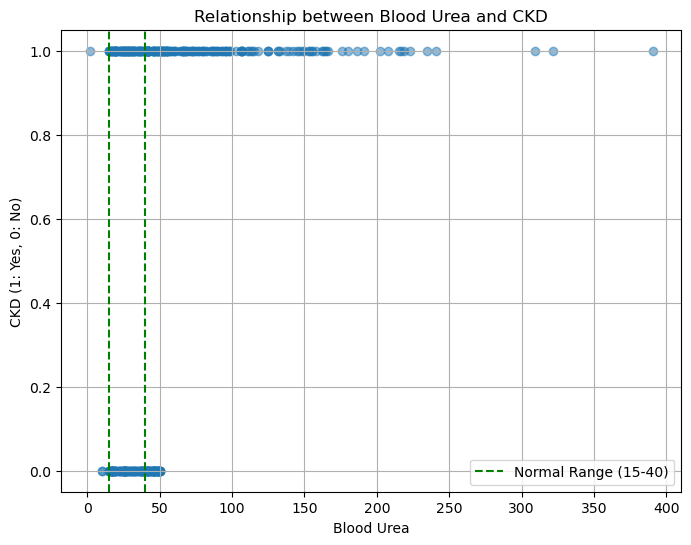

In [38]:
import matplotlib.pyplot as plt

# Extract the 'bu' and 'classification' columns from the DataFrame
bu = df['bu']
ckd = df['classification']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(bu, ckd, alpha=0.5)

# Add a horizontal line to represent the normal range of blood urea
plt.axvline(x=15, color='green', linestyle='--', label='Normal Range (15-40)')
plt.axvline(x=40, color='green', linestyle='--')

# Customize the plot
plt.title('Relationship between Blood Urea and CKD')
plt.xlabel('Blood Urea')
plt.ylabel('CKD (1: Yes, 0: No)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## Serum Creatinine vs CKD

#### The normal range of the serum creatine is 0.5 to 1.5 if the serum creatinine is above the normal range, there will be a higher chance of ckd, let's check this with visualization

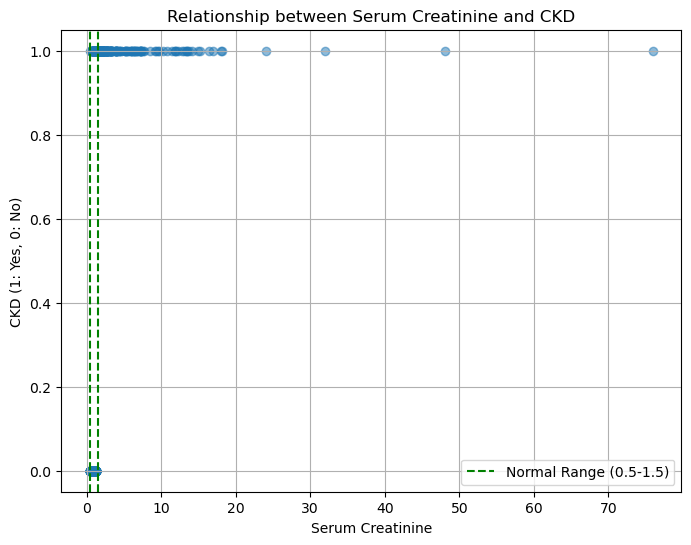

In [39]:
import matplotlib.pyplot as plt

# Extract the 'sc' and 'classification' columns from the DataFrame
sc = df['sc']
ckd = df['classification']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sc, ckd, alpha=0.5)

# Add a horizontal line to represent the normal range of serum creatinine
plt.axvline(x=0.5, color='green', linestyle='--', label='Normal Range (0.5-1.5)')
plt.axvline(x=1.5, color='green', linestyle='--')

# Customize the plot
plt.title('Relationship between Serum Creatinine and CKD')
plt.xlabel('Serum Creatinine')
plt.ylabel('CKD (1: Yes, 0: No)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


1    250
0    150
Name: classification, dtype: int64


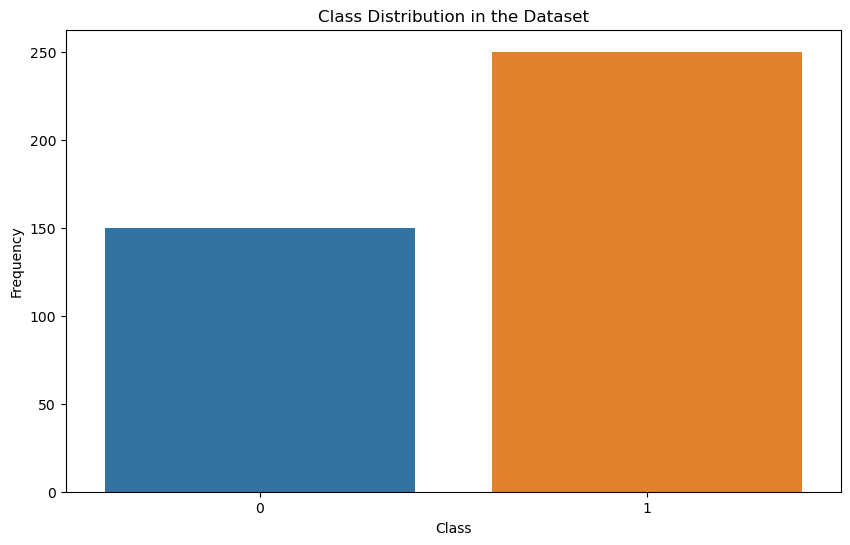

In [40]:
# Count the instances of each class
class_counts = df['classification'].value_counts()

# Print the class counts
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Defining feature set (X) and Target variable (y)

In [41]:
# Define the feature set (X) and target variable (y)
X=df_ckd[['age', 'sc', 'al', 'pc', 'bgr', 'bu', 'htn', 'dm', 'pe', 'ane']]
y = df_ckd['classification']

# Check the shapes of X and y
print('Feature set (X) shape:', X.shape)
print('Target variable (y) shape:', y.shape)

Feature set (X) shape: (400, 10)
Target variable (y) shape: (400,)


#### Standarlization of the dataset is an common requirement for many machine learning algorithms implemented in scikit-learn.they might behave badly if the individual features do not more or less look like standard normally distributed data.Gaussian with zero mean and unit variance.

In [42]:
from sklearn.preprocessing import StandardScaler
# Scale the feature set
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
X.shape

(400, 10)

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 1. Logistic Regression Model 

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#logistic regression model
log_reg = LogisticRegression(random_state=42)

#hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [46]:
# GridSearchCV with the logistic regression model and the hyperparameter grid
grid_search = GridSearchCV(log_reg, param_grid, cv=15, scoring='accuracy')

In [47]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score found:  0.964888888888889


/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/raja/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

### Logistic Regression Model Evaluation

Accuracy: 96.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.98      0.95      0.97        65

    accuracy                           0.96       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



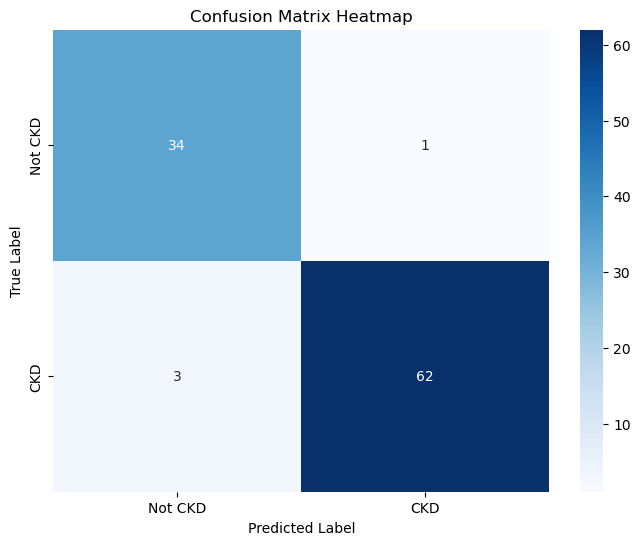

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Using the best estimator found by GridSearchCV to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [49]:
# Training accuracy
y_train_pred = best_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred) * 100
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Testing accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Training Accuracy: 97.30%
Testing Accuracy: 96.00%


ROC AUC: 0.99


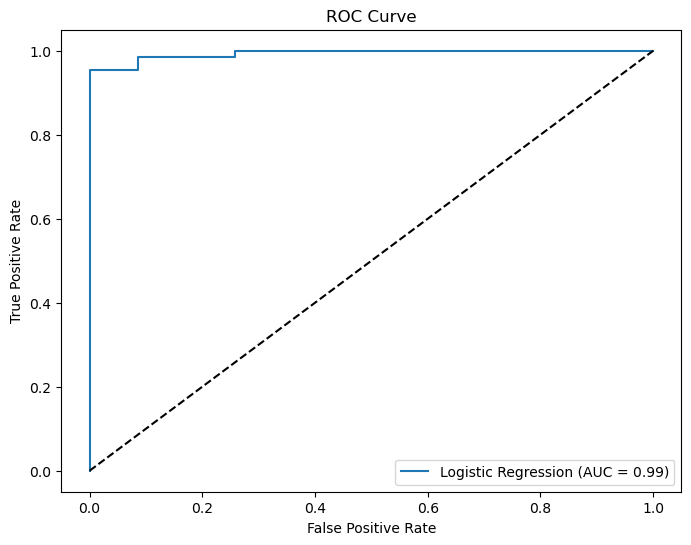

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
## Let's save the model

from joblib import dump

# Save the best model to a file
dump(grid_search.best_estimator_, 'ckd_logistic_regression_model.joblib')

['ckd_logistic_regression_model.joblib']

# 2. Decision Tree Classifier Algorithm

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# Define a hyperparameter grid to search
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize GridSearchCV with the Decision Tree model and the hyperparameter grid
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=15, scoring='accuracy')

# Fit GridSearchCV on the training data
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best parameters found for Decision Tree: ", dt_grid_search.best_params_)
print("Best score found for Decision Tree: ", dt_grid_search.best_score_)

Best parameters found for Decision Tree:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score found for Decision Tree:  0.9544444444444445


### Decision Treee Model Evaluation

Decision Tree Accuracy: 95.00%

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.97      0.95      0.96        65

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



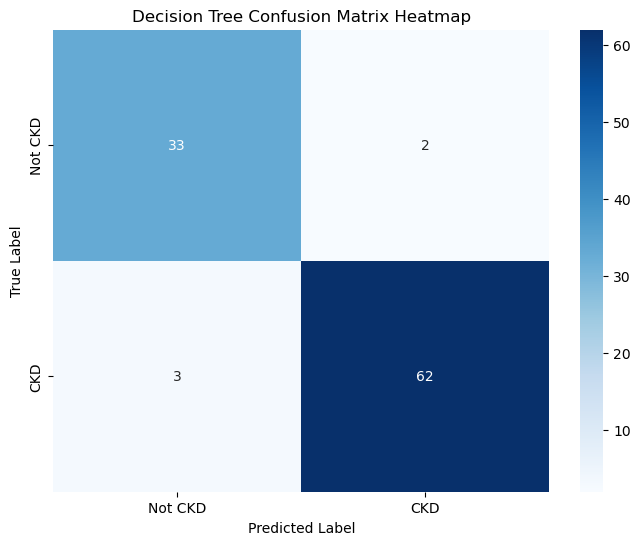

In [53]:
# Use the best estimator found by GridSearchCV to make predictions on the test set
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Calculate and print the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}%")

# Generate and print the classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Generate the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix Heatmap')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

# Use the best estimator found by GridSearchCV to make predictions on the training set
y_train_pred_dt = best_dt_model.predict(X_train_resampled)

# Calculate training accuracy
training_accuracy_dt = accuracy_score(y_train_resampled, y_train_pred_dt) * 100
print(f"Decision Tree Training Accuracy: {training_accuracy_dt:.2f}%")

# Calculate testing accuracy (already calculated in the previous code)
print(f"Decision Tree Testing Accuracy: {accuracy_dt:.2f}%")

Decision Tree Training Accuracy: 95.95%
Decision Tree Testing Accuracy: 95.00%


Decision Tree ROC AUC: 0.97


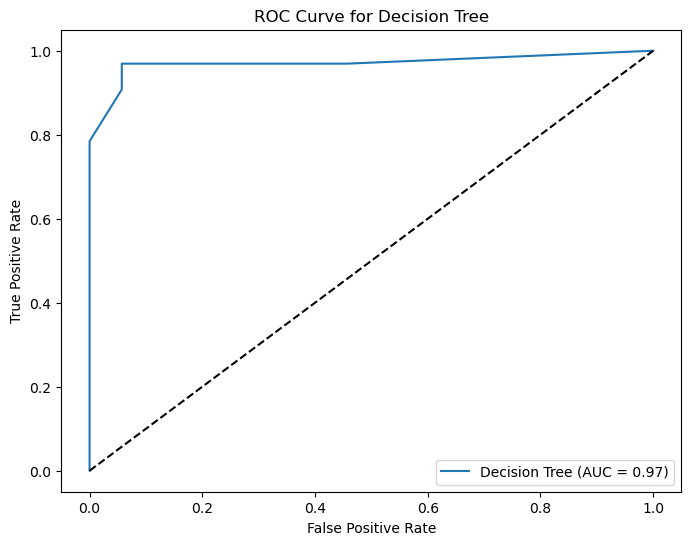

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calculate the AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
print(f"Decision Tree ROC AUC: {roc_auc_dt:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [56]:
# Save the best Decision Tree model to a file
dump(dt_grid_search.best_estimator_, 'ckd_decision_tree_model.joblib')

['ckd_decision_tree_model.joblib']

# 3. K-Nearest Neighbors (KNN) Algorithm

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Define the KNN model
knn_clf = KNeighborsClassifier()

# Define a hyperparameter grid to search
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV with the KNN model and the hyperparameter grid
knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, cv=15, scoring='accuracy')

# Fit GridSearchCV on the scaled training data
knn_grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best parameters found for KNN: ", knn_grid_search.best_params_)
print("Best score found for KNN: ", knn_grid_search.best_score_)

Best parameters found for KNN:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best score found for KNN:  0.9514444444444444


## KNN Model Evaluation

KNN Accuracy: 98.00%

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



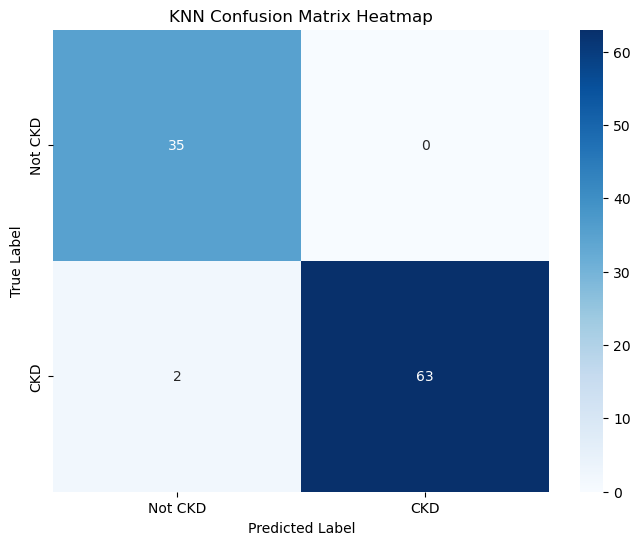

In [59]:
# Use the best estimator found by GridSearchCV to make predictions on the scaled test set
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Calculate and print the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print(f"KNN Accuracy: {accuracy_knn:.2f}%")

# Generate and print the classification report
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix Heatmap')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score

# Use the best estimator found by GridSearchCV to make predictions on the scaled training set
y_train_pred_knn = best_knn_model.predict(X_train_resampled)

# Calculate training accuracy
training_accuracy_knn = accuracy_score(y_train_resampled, y_train_pred_knn) * 100
print(f"KNN Training Accuracy: {training_accuracy_knn:.2f}%")

# Calculate testing accuracy (already calculated in the previous code)
print(f"KNN Testing Accuracy: {accuracy_knn:.2f}%")

KNN Training Accuracy: 100.00%
KNN Testing Accuracy: 98.00%


KNN ROC AUC: 0.98


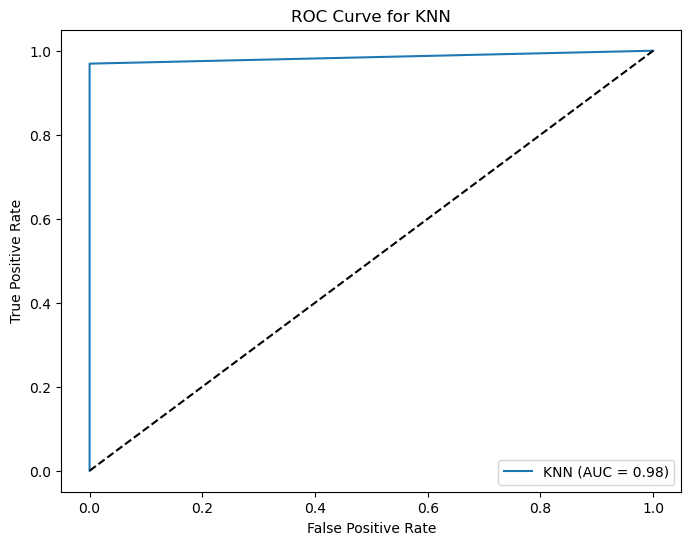

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability scores for the positive class
y_pred_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calculate the AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
print(f"KNN ROC AUC: {roc_auc_knn:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line represents a random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

In [62]:
from joblib import dump

# Save the best KNN model to a file
dump(knn_grid_search.best_estimator_, 'ckd_knn_model.joblib')

['ckd_knn_model.joblib']